In [ ]:
#Import necessary libraries

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
from google.colab.patches import cv2_imshow
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
# from tf.keras.models import Model

In [ ]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("depthmap"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'depthmap'.
There are 0 directories and 0 images in 'depthmap/.ipynb_checkpoints'.
There are 0 directories and 1 images in 'depthmap/test'.
There are 0 directories and 8 images in 'depthmap/train'.


In [ ]:
# View an image
def view_random_image(target_dir):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  # img = mpimg.imread(target_folder + "/" + random_image[0])
  img = cv2.imread(target_folder + "/" + random_image[0])
  cv2_imshow(img)
  # plt.title(random_image)
  # plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



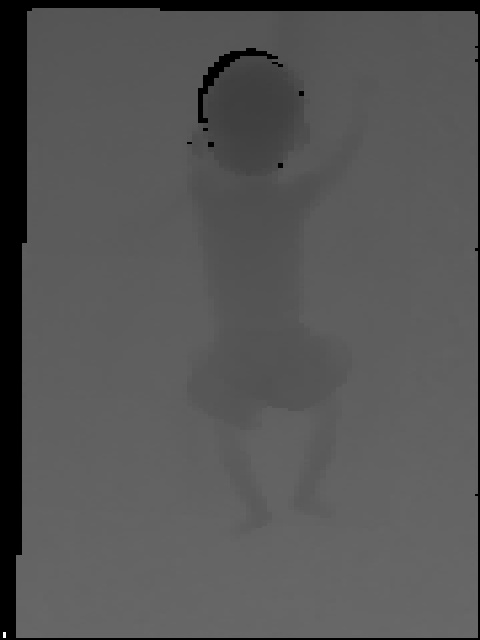

Image shape: (640, 480, 3)


In [ ]:
img = view_random_image(target_dir="depthmap/train/")

In [ ]:
# img

In [ ]:
img.shape

(640, 480, 3)

In [ ]:
import tensorflow as tf

tf.reduce_max(img),tf.reduce_min(img)

(<tf.Tensor: shape=(), dtype=uint8, numpy=255>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

#Data preparation - depth map images

In [ ]:
img_shape = (224,224)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
# Create a flow from the directory using same seed and 'training' subset.
valid_gen = valid_datagen.flow_from_directory('depthmap/.',classes=['test'],target_size=img_shape)
train_gen = train_datagen.flow_from_directory('depthmap/.',classes=['train'], target_size=img_shape)

Found 1 images belonging to 1 classes.
Found 8 images belonging to 1 classes.


#Data preparation - key points

In [ ]:
height_and_pose =  pd.read_excel("/content/height_and_pose.xlsx")

In [ ]:
height_and_pose

,Depthmap Image,Height(cm),Pose
0,1d5fee00-ada4-11eb-a80b-3f50af21830f,76.7,"[{'bbox_coordinates': [(158.91087, 92.53168), ..."
1,1eddf4c0-ad9f-11eb-a80b-ef4adba049aa,66.4,"[{'bbox_coordinates': [(131.00702, 68.115364),..."
2,38e29bc0-8fc0-11eb-b5f2-0742da91b282,63.2,"[{'bbox_coordinates': [(116.070114, 37.567608)..."
3,6cd5d480-8b8b-11eb-b152-f7b115384fa9,87.1,"[{'bbox_coordinates': [(145.24242, 26.49348), ..."
4,76ed6fc0-8e1d-11eb-ad70-7be1a1219834,59.1,"[{'bbox_coordinates': [(150.17046, 65.00379), ..."
5,8d23fa60-9201-11eb-b3e6-cbfb48c6a300,86.4,"[{'bbox_coordinates': [(146.97789, 37.342777),..."
6,9dc3eba0-8d8d-11eb-8d3f-4776be867c61,100.6,"[{'bbox_coordinates': [(135.09724, 42.205784),..."
7,9dd020a0-8d8d-11eb-8d3f-bfd9f6bd04d4,106.1,"[{'bbox_coordinates': [(167.52087, 52.946323),..."
8,d3757800-8dff-11eb-a328-472d4f8db277,99.9,"[{'bbox_coordinates': [(92.025406, 19.148962),..."


In [ ]:
# Converting pose column from string type to list of dictionary
for i in range(0,len(height_and_pose)):
      height_and_pose["Pose"][i] = list(eval(str(height_and_pose["Pose"][i])))

<ipython-input-11-efea5f8f8e15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_and_pose["Pose"][i] = list(eval(str(height_and_pose["Pose"][i])))


In [ ]:
#exploding the list to different columns
df_pose=pd.DataFrame(height_and_pose["Pose"].explode().tolist())

In [ ]:
df_pose

,bbox_coordinates,bbox_confidence_score,key_points_coordinate,key_points_prob,body_pose_score
0,"[(158.91087, 92.53168), (396.85934, 616.8171)]",[0.99280316],"[{'nose': {'x': 265.9385, 'y': 182.3019}}, {'l...","[{'nose': {'score': 0.9733702}}, {'left_eye': ...",0.932521
1,"[(131.00702, 68.115364), (420.1891, 559.3997)]",[0.9962908],"[{'nose': {'x': 305.9835, 'y': 200.21199}}, {'...","[{'nose': {'score': 0.4369605}}, {'left_eye': ...",0.778794
2,"[(116.070114, 37.567608), (395.045, 542.00757)]",[0.98634934],"[{'nose': {'x': 191.51735, 'y': 123.93983}}, {...","[{'nose': {'score': 0.64242655}}, {'left_eye':...",0.877052
3,"[(145.24242, 26.49348), (346.4439, 637.2346)]",[0.999383],"[{'nose': {'x': 239.8789, 'y': 142.99553}}, {'...","[{'nose': {'score': 0.96169055}}, {'left_eye':...",0.955477
4,"[(150.17046, 65.00379), (373.36887, 611.4233)]",[0.9969072],"[{'nose': {'x': 167.49805, 'y': 155.00647}}, {...","[{'nose': {'score': 0.58681124}}, {'left_eye':...",0.853830
5,"[(146.97789, 37.342777), (323.04355, 616.20996)]",[0.9988991],"[{'nose': {'x': 304.73105, 'y': 143.99603}}, {...","[{'nose': {'score': 0.9652283}}, {'left_eye': ...",0.908704
6,"[(135.09724, 42.205784), (308.40625, 609.4822)]",[0.99963164],"[{'nose': {'x': 212.51872, 'y': 161.49629}}, {...","[{'nose': {'score': 0.96656704}}, {'left_eye':...",0.960757
7,"[(167.52087, 52.946323), (322.8788, 583.97754)]",[0.999605],"[{'nose': {'x': 222.72783, 'y': 157.70052}}, {...","[{'nose': {'score': 0.9798624}}, {'left_eye': ...",0.961107
8,"[(92.025406, 19.148962), (295.21625, 625.0551)]",[0.99962795],"[{'nose': {'x': 235.04018, 'y': 126.83931}}, {...","[{'nose': {'score': 0.7892967}}, {'left_eye': ...",0.915556


In [ ]:
df_pose["key_points_coordinate"][0]

[{'nose': {'x': 265.9385, 'y': 182.3019}},
 {'left_eye': {'x': 289.8317, 'y': 168.64862}},
 {'right_eye': {'x': 245.45859, 'y': 165.2353}},
 {'left_ear': {'x': 317.13824, 'y': 178.88858}},
 {'right_ear': {'x': 221.56538, 'y': 172.06195}},
 {'left_shoulder': {'x': 334.20483, 'y': 233.50165}},
 {'right_shoulder': {'x': 221.56538, 'y': 243.7416}},
 {'left_elbow': {'x': 378.57794, 'y': 284.7014}},
 {'right_elbow': {'x': 194.25885, 'y': 308.5946}},
 {'left_wrist': {'x': 358.09805, 'y': 342.72778}},
 {'right_wrist': {'x': 235.21864, 'y': 315.42123}},
 {'left_hip': {'x': 341.03146, 'y': 393.92752}},
 {'right_hip': {'x': 269.3518, 'y': 404.16748}},
 {'left_knee': {'x': 354.68472, 'y': 506.56696}},
 {'right_knee': {'x': 231.80533, 'y': 486.08707}},
 {'left_ankle': {'x': 313.7249, 'y': 489.50037}},
 {'right_ankle': {'x': 214.73874, 'y': 547.52673}}]

In [ ]:
# df_pose2 = df_pose["key_points_coordinate"].apply(lambda x : dict(eval('x')))
df_pose2 = df_pose["key_points_coordinate"].apply(pd.Series)

In [ ]:
df_pose2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"{'nose': {'x': 265.9385, 'y': 182.3019}}","{'left_eye': {'x': 289.8317, 'y': 168.64862}}","{'right_eye': {'x': 245.45859, 'y': 165.2353}}","{'left_ear': {'x': 317.13824, 'y': 178.88858}}","{'right_ear': {'x': 221.56538, 'y': 172.06195}}","{'left_shoulder': {'x': 334.20483, 'y': 233.50...","{'right_shoulder': {'x': 221.56538, 'y': 243.7...","{'left_elbow': {'x': 378.57794, 'y': 284.7014}}","{'right_elbow': {'x': 194.25885, 'y': 308.5946}}","{'left_wrist': {'x': 358.09805, 'y': 342.72778}}","{'right_wrist': {'x': 235.21864, 'y': 315.42123}}","{'left_hip': {'x': 341.03146, 'y': 393.92752}}","{'right_hip': {'x': 269.3518, 'y': 404.16748}}","{'left_knee': {'x': 354.68472, 'y': 506.56696}}","{'right_knee': {'x': 231.80533, 'y': 486.08707}}","{'left_ankle': {'x': 313.7249, 'y': 489.50037}}","{'right_ankle': {'x': 214.73874, 'y': 547.52673}}"
1,"{'nose': {'x': 305.9835, 'y': 200.21199}}","{'left_eye': {'x': 197.23564, 'y': 152.235}}","{'right_eye': {'x': 305.9835, 'y': 181.0212}}","{'left_ear': {'x': 216.42644, 'y': 177.82274}}","{'right_ear': {'x': 286.7927, 'y': 197.01353}}","{'left_shoulder': {'x': 210.0295, 'y': 219.402...","{'right_shoulder': {'x': 305.9835, 'y': 228.99...","{'left_elbow': {'x': 184.44177, 'y': 187.41814}}","{'right_elbow': {'x': 373.15128, 'y': 222.60126}}","{'left_wrist': {'x': 203.63257, 'y': 129.84575}}","{'right_wrist': {'x': 398.73898, 'y': 184.21967}}","{'left_hip': {'x': 242.01416, 'y': 353.73837}}","{'right_hip': {'x': 305.9835, 'y': 350.5399}}","{'left_knee': {'x': 235.61723, 'y': 427.30307}}","{'right_knee': {'x': 344.36508, 'y': 398.51688}}","{'left_ankle': {'x': 267.6019, 'y': 494.47086}}","{'right_ankle': {'x': 360.3574, 'y': 472.0816}}"
2,"{'nose': {'x': 191.51735, 'y': 123.93983}}","{'left_eye': {'x': 201.36969, 'y': 123.93983}}","{'right_eye': {'x': 299.89313, 'y': 137.0763}}","{'left_ear': {'x': 198.08557, 'y': 150.21274}}","{'right_ear': {'x': 299.89313, 'y': 140.3604}}","{'left_shoulder': {'x': 201.36969, 'y': 196.19...","{'right_shoulder': {'x': 296.609, 'y': 202.758...","{'left_elbow': {'x': 191.51735, 'y': 127.223946}}","{'right_elbow': {'x': 342.5866, 'y': 153.49686}}","{'left_wrist': {'x': 204.65381, 'y': 97.666916}}","{'right_wrist': {'x': 362.2913, 'y': 100.951035}}","{'left_hip': {'x': 234.21083, 'y': 350.5437}}","{'right_hip': {'x': 293.3249, 'y': 357.11194}}","{'left_knee': {'x': 224.35849, 'y': 432.64658}}","{'right_knee': {'x': 319.5978, 'y': 416.22598}}","{'left_ankle': {'x': 250.6314, 'y': 508.18118}}","{'right_ankle': {'x': 306.46133, 'y': 488.4765}}"
3,"{'nose': {'x': 239.8789, 'y': 142.99553}}","{'left_eye': {'x': 263.73596, 'y': 127.090805}}","{'right_eye': {'x': 223.97418, 'y': 127.090805}}","{'left_ear': {'x': 295.5454, 'y': 135.04317}}","{'right_ear': {'x': 208.06947, 'y': 135.04317}}","{'left_shoulder': {'x': 311.45013, 'y': 202.63...","{'right_shoulder': {'x': 204.09329, 'y': 194.6...","{'left_elbow': {'x': 323.37866, 'y': 278.1856}}","{'right_elbow': {'x': 172.28386, 'y': 270.23328}}","{'left_wrist': {'x': 323.37866, 'y': 341.8045}}","{'right_wrist': {'x': 160.35532, 'y': 337.8283}}","{'left_hip': {'x': 271.68832, 'y': 373.61392}}","{'right_hip': {'x': 208.06947, 'y': 369.63776}}","{'left_knee': {'x': 259.7598, 'y': 476.9946}}","{'right_knee': {'x': 196.14093, 'y': 469.04224}}","{'left_ankle': {'x': 243.85509, 'y': 560.4944}}","{'right_ankle': {'x': 188.18857, 'y': 556.5182}}"
4,"{'nose': {'x': 167.49805, 'y': 155.00647}}","{'left_eye': {'x': 171.05548, 'y': 151.44904}}","{'right_eye': {'x': 174.61288, 'y': 151.44904}}","{'left_ear': {'x': 213.7445, 'y': 169.23615}}","{'right_ear': {'x': 295.56512, 'y': 147.89163}}","{'left_shoulder': {'x': 195.9574, 'y': 219.040...","{'right_shoulder': {'x': 309.7948, 'y': 176.35...","{'left_elbow': {'x': 160.38321, 'y': 194.13806}}","{'right_elbow': {'x': 348.92642, 'y': 140.7768}}","{'left_wrist': {'x': 167.49805, 'y': 147.89163}}","{'right_wrist': {'x': 331.1393, 'y': 98.08776}}","{'left_

In [ ]:
## uncomment this if you want to add bbox values to the model

# df_bbox = df_pose["bbox_coordinates"].apply(pd.Series)
# df_bbox.columns =["bbox_coordinates_xy1","bbox_coordinates_xy2"]

# bbox2 = pd.DataFrame(df_bbox["bbox_coordinates_xy1"].tolist(),columns=["bbox_coordinates_x1","bbox_coordinates_y1"])
# bbox3 = pd.DataFrame(df_bbox["bbox_coordinates_xy2"].tolist(),columns=["bbox_coordinates_x2","bbox_coordinates_y2"])

# bbox_data = bbox2.join(bbox3)

In [ ]:
# bbox_data

In [ ]:
#Preparing key points coordinates model
column_names = []
for col in df_pose2.columns.to_list():
  column_names.append(list(df_pose2[col][0].keys())[0])
  print(list(df_pose2[col][0].keys())[0])
  print(list(df_pose2[col][0].values())[0])
  print(df_pose2[col][0])

nose
{'x': 265.9385, 'y': 182.3019}
{'nose': {'x': 265.9385, 'y': 182.3019}}
left_eye
{'x': 289.8317, 'y': 168.64862}
{'left_eye': {'x': 289.8317, 'y': 168.64862}}
right_eye
{'x': 245.45859, 'y': 165.2353}
{'right_eye': {'x': 245.45859, 'y': 165.2353}}
left_ear
{'x': 317.13824, 'y': 178.88858}
{'left_ear': {'x': 317.13824, 'y': 178.88858}}
right_ear
{'x': 221.56538, 'y': 172.06195}
{'right_ear': {'x': 221.56538, 'y': 172.06195}}
left_shoulder
{'x': 334.20483, 'y': 233.50165}
{'left_shoulder': {'x': 334.20483, 'y': 233.50165}}
right_shoulder
{'x': 221.56538, 'y': 243.7416}
{'right_shoulder': {'x': 221.56538, 'y': 243.7416}}
left_elbow
{'x': 378.57794, 'y': 284.7014}
{'left_elbow': {'x': 378.57794, 'y': 284.7014}}
right_elbow
{'x': 194.25885, 'y': 308.5946}
{'right_elbow': {'x': 194.25885, 'y': 308.5946}}
left_wrist
{'x': 358.09805, 'y': 342.72778}
{'left_wrist': {'x': 358.09805, 'y': 342.72778}}
right_wrist
{'x': 235.21864, 'y': 315.42123}
{'right_wrist': {'x': 235.21864, 'y': 315.42123

In [ ]:
df_pose2.columns = column_names
for i in range(0,len(df_pose2)):
  for col in df_pose2.columns:
    df_pose2[col][i] = (list(df_pose2[col][i].values())[0])

In [ ]:
df_pose2

,nose,left_eye,right_eye,left_ear,right_ear,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
0,"{'x': 265.9385, 'y': 182.3019}","{'x': 289.8317, 'y': 168.64862}","{'x': 245.45859, 'y': 165.2353}","{'x': 317.13824, 'y': 178.88858}","{'x': 221.56538, 'y': 172.06195}","{'x': 334.20483, 'y': 233.50165}","{'x': 221.56538, 'y': 243.7416}","{'x': 378.57794, 'y': 284.7014}","{'x': 194.25885, 'y': 308.5946}","{'x': 358.09805, 'y': 342.72778}","{'x': 235.21864, 'y': 315.42123}","{'x': 341.03146, 'y': 393.92752}","{'x': 269.3518, 'y': 404.16748}","{'x': 354.68472, 'y': 506.56696}","{'x': 231.80533, 'y': 486.08707}","{'x': 313.7249, 'y': 489.50037}","{'x': 214.73874, 'y': 547.52673}"
1,"{'x': 305.9835, 'y': 200.21199}","{'x': 197.23564, 'y': 152.235}","{'x': 305.9835, 'y': 181.0212}","{'x': 216.42644, 'y': 177.82274}","{'x': 286.7927, 'y': 197.01353}","{'x': 210.0295, 'y': 219.40279}","{'x': 305.9835, 'y': 228.99818}","{'x': 184.44177, 'y': 187.41814}","{'x': 373.15128, 'y': 222.60126}","{'x': 203.63257, 'y': 129.84575}","{'x': 398.73898, 'y': 184.21967}","{'x': 242.01416, 'y': 353.73837}","{'x': 305.9835, 'y': 350.5399}","{'x': 235.61723, 'y': 427.30307}","{'x': 344.36508, 'y': 398.51688}","{'x': 267.6019, 'y': 494.47086}","{'x': 360.3574, 'y': 472.0816}"
2,"{'x': 191.51735, 'y': 123.93983}","{'x': 201.36969, 'y': 123.93983}","{'x': 299.89313, 'y': 137.0763}","{'x': 198.08557, 'y': 150.21274}","{'x': 299.89313, 'y': 140.3604}","{'x': 201.36969, 'y': 196.19034}","{'x': 296.609, 'y': 202.75858}","{'x': 191.51735, 'y': 127.223946}","{'x': 342.5866, 'y': 153.49686}","{'x': 204.65381, 'y': 97.666916}","{'x': 362.2913, 'y': 100.951035}","{'x': 234.21083, 'y': 350.5437}","{'x': 293.3249, 'y': 357.11194}","{'x': 224.35849, 'y': 432.64658}","{'x': 319.5978, 'y': 416.22598}","{'x': 250.6314, 'y': 508.18118}","{'x': 306.46133, 'y': 488.4765}"
3,"{'x': 239.8789, 'y': 142.99553}","{'x': 263.73596, 'y': 127.090805}","{'x': 223.97418, 'y': 127.090805}","{'x': 295.5454, 'y': 135.04317}","{'x': 208.06947, 'y': 135.04317}","{'x': 311.45013, 'y': 202.63821}","{'x': 204.09329, 'y': 194.68585}","{'x': 323.37866, 'y': 278.1856}","{'x': 172.28386, 'y': 270.23328}","{'x': 323.37866, 'y': 341.8045}","{'x': 160.35532, 'y': 337.8283}","{'x': 271.68832, 'y': 373.61392}","{'x': 208.06947, 'y': 369.63776}","{'x': 259.7598, 'y': 476.9946}","{'x': 196.14093, 'y': 469.04224}","{'x': 243.85509, 'y': 560.4944}","{'x': 188.18857, 'y': 556.5182}"
4,"{'x': 167.49805, 'y': 155.00647}","{'x': 171.05548, 'y': 151.44904}","{'x': 174.61288, 'y': 151.44904}","{'x': 213.7445, 'y': 169.23615}","{'x': 295.56512, 'y': 147.89163}","{'x': 195.9574, 'y': 219.04001}","{'x': 309.7948, 'y': 176.35098}","{'x': 160.38321, 'y': 194.13806}","{'x': 348.92642, 'y': 140.7768}","{'x': 167.49805, 'y': 147.89163}","{'x': 331.1393, 'y': 98.08776}","{'x': 235.08902, 'y': 361.33676}","{'x': 309.7948, 'y': 350.6645}","{'x': 203.07224, 'y': 443.15738}","{'x': 324.02448, 'y': 450.27222}","{'x': 224.41675, 'y': 539.2077}","{'x': 309.7948, 'y': 546.3225}"
5,"{'x': 304.73105, 'y': 143.99603}","{'x': 300.96237, 'y': 128.92137}","{'x': 293.42505, 'y': 128.92137}","{'x': 233.12637, 'y': 136.45871}","{'x': 236.89505, 'y': 140.22737}","{'x': 191.67105, 'y': 200.52603}","{'x': 263.2757, 'y': 211.83203}","{'x': 165.29037, 'y': 275.89935}","{'x': 289.65637, 'y': 313.58603}","{'x': 221.82037, 'y': 298.51135}","{'x': 304.73105, 'y': 279.66803}","{'x': 199.20837, 'y': 362.5787}","{'x': 255.73837, 'y': 373.8847}","{'x': 218.05171, 'y': 479.40735}","{'x': 259.50705, 'y': 490.71338}","{'x': 210.51437, 'y': 581.1614}","{'x': 263.2757, 'y': 592.46735}"
6,"{'x': 212.51872, 'y': 161.49629}","{'x': 227.29155, 'y': 143.03027}","{'x': 194.05269, 'y': 143.03027}","{'x': 256.8372, 'y': 139.33707}","{'x': 171.89346, 'y': 139.33707}","{'x': 271.61002, 'y': 216.8944}","{'x': 160.81384, 'y': 220.5876}","{'x': 286.38284, 'y': 301.83813}","{'x': 149.

In [ ]:
df_pose3 = df_pose2.copy()
for col in df_pose3.columns: # or df.columns
    for c in df_pose3[col].explode().unique():
        df_pose3[f'{col}_{c}'] = df_pose3[col].str[c]
df_pose3 = df_pose3.drop(column_names, axis=1)

In [ ]:
(df_pose3)

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,265.93850,182.30190,289.83170,168.648620,245.45859,165.235300,317.13824,178.88858,221.56538,172.06195,...,269.35180,404.16748,354.68472,506.56696,231.80533,486.08707,313.72490,489.50037,214.73874,547.52673
1,305.98350,200.21199,197.23564,152.235000,305.98350,181.021200,216.42644,177.82274,286.79270,197.01353,...,305.98350,350.53990,235.61723,427.30307,344.36508,398.51688,267.60190,494.47086,360.35740,472.08160
2,191.51735,123.93983,201.36969,123.939830,299.89313,137.076300,198.08557,150.21274,299.89313,140.36040,...,293.32490,357.11194,224.35849,432.64658,319.59780,416.22598,250.63140,508.18118,306.46133,488.47650
3,239.87890,142.99553,263.73596,127.090805,223.97418,127.090805,295.54540,135.04317,208.06947,135.04317,...,208.06947,369.63776,259.75980,476.99460,196.14093,469.04224,243.85509,560.49440,188.18857,556.51820
4,167.49805,155.00647,171.05548,151.449040,174.61288,151.449040,213.74450,169.23615,295.56512,147.89163,...,309.79480,350.66450,203.07224,443.15738,324.02448,450.27222,224.41675,539.20770,309.79480,546.32250
5,304.73105,143.99603,300.96237,128.921370,293.42505,128.921370,233.12637,136.45871,236.89505,140.22737,...,255.73837,373.88470,218.05171,479.40735,259.50705,490.71338,210.51437,581.16140,263.27570,592.46735
6,212.51872,161.49629,227.29155,143.030270,194.05269,143.030270,256.83720,139.33707,171.89346,139.33707,...,190.35948,349.84980,245.75758,449.56638,190.35948,453.25958,238.37117,519.73730,194.05269,530.81690
7,222.72783,157.70052,240.01399,136.957100,208.89888,140.414350,267.67188,143.87158,195.06995,150.78606,...,215.81335,361.67734,260.75740,451.56543,222.72783,455.02267,253.84293,524.16736,229.64229,524.16736
8,235.04018,126.83931,235.04018,118.949905,242.92958,111.060500,148.25676,115.00520,235.04018,111.06050,...,231.09547,371.41080,164.03555,477.91772,231.09547,470.02832,140.36736,588.36940,250.81898,580.48000


In [ ]:
# df_pose_data = df_pose3.join(bbox_data)
df_pose_data = df_pose3

In [ ]:
df_pose_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,265.93850,182.30190,289.83170,168.648620,245.45859,165.235300,317.13824,178.88858,221.56538,172.06195,...,269.35180,404.16748,354.68472,506.56696,231.80533,486.08707,313.72490,489.50037,214.73874,547.52673
1,305.98350,200.21199,197.23564,152.235000,305.98350,181.021200,216.42644,177.82274,286.79270,197.01353,...,305.98350,350.53990,235.61723,427.30307,344.36508,398.51688,267.60190,494.47086,360.35740,472.08160
2,191.51735,123.93983,201.36969,123.939830,299.89313,137.076300,198.08557,150.21274,299.89313,140.36040,...,293.32490,357.11194,224.35849,432.64658,319.59780,416.22598,250.63140,508.18118,306.46133,488.47650
3,239.87890,142.99553,263.73596,127.090805,223.97418,127.090805,295.54540,135.04317,208.06947,135.04317,...,208.06947,369.63776,259.75980,476.99460,196.14093,469.04224,243.85509,560.49440,188.18857,556.51820
4,167.49805,155.00647,171.05548,151.449040,174.61288,151.449040,213.74450,169.23615,295.56512,147.89163,...,309.79480,350.66450,203.07224,443.15738,324.02448,450.27222,224.41675,539.20770,309.79480,546.32250
5,304.73105,143.99603,300.96237,128.921370,293.42505,128.921370,233.12637,136.45871,236.89505,140.22737,...,255.73837,373.88470,218.05171,479.40735,259.50705,490.71338,210.51437,581.16140,263.27570,592.46735
6,212.51872,161.49629,227.29155,143.030270,194.05269,143.030270,256.83720,139.33707,171.89346,139.33707,...,190.35948,349.84980,245.75758,449.56638,190.35948,453.25958,238.37117,519.73730,194.05269,530.81690
7,222.72783,157.70052,240.01399,136.957100,208.89888,140.414350,267.67188,143.87158,195.06995,150.78606,...,215.81335,361.67734,260.75740,451.56543,222.72783,455.02267,253.84293,524.16736,229.64229,524.16736
8,235.04018,126.83931,235.04018,118.949905,242.92958,111.060500,148.25676,115.00520,235.04018,111.06050,...,231.09547,371.41080,164.03555,477.91772,231.09547,470.02832,140.36736,588.36940,250.81898,580.48000


In [ ]:
height_and_pose.columns

Index(['Depthmap Image', 'Height(cm)', 'Pose'], dtype='object')

In [ ]:
#gtting training and testing data
x_train_pose = df_pose_data[0:8]
x_test_pose = df_pose_data[-1:]
y_train =height_and_pose["Height(cm)"][0:8]
y_test = height_and_pose["Height(cm)"][-1:]

In [ ]:
x_test_pose

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
8,235.04018,126.83931,235.04018,118.949905,242.92958,111.0605,148.25676,115.0052,235.04018,111.0605,...,231.09547,371.4108,164.03555,477.91772,231.09547,470.02832,140.36736,588.3694,250.81898,580.48


In [ ]:
x_test_pose.shape

(1, 34)

In [ ]:
y_test

8    99.9
Name: Height(cm), dtype: float64

In [ ]:
x_train_pose.shape,x_test_pose.shape,y_test.shape,y_train.shape

((8, 34), (1, 34), (1,), (8,))

In [ ]:
scaler = preprocessing.MinMaxScaler()

normalized_x_train_pose = pd.DataFrame(
    scaler.fit_transform(x_train_pose),
    columns = x_train_pose.columns
)

normalized_x_test_pose = pd.DataFrame(
    scaler.transform(x_test_pose),
    columns = x_test_pose.columns
)


In [ ]:
normalized_x_train_pose

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.710836,0.765182,0.914318,1.000000,0.539281,0.707291,1.000000,1.000000,0.388063,0.597363,...,0.661382,1.000000,1.000000,1.000000,0.269119,0.949821,1.000000,0.000000,0.154210,0.626695
1,1.000000,1.000000,0.201530,0.632877,1.000000,1.000000,0.154057,0.975691,0.897653,1.000000,...,0.968089,0.012705,0.214659,0.000000,1.000000,0.000000,0.553117,0.054227,1.000000,0.000000
2,0.173443,0.000000,0.233353,0.000000,0.953640,0.185155,0.000000,0.345979,1.000000,0.085803,...,0.862102,0.133698,0.140399,0.067414,0.839179,0.192080,0.388691,0.203803,0.686958,0.136186
3,0.522660,0.249838,0.713438,0.070478,0.375741,0.000000,0.818628,0.000000,0.282626,0.000000,...,0.148281,0.364301,0.373898,0.626913,0.037541,0.764946,0.323036,0.774528,0.000000,0.701384
4,0.000000,0.407313,0.000000,0.615298,0.000000,0.451661,0.131529,0.779853,0.966187,0.207332,...,1.000000,0.014999,0.000000,0.200019,0.867923,0.561359,0.134699,0.542295,0.706320,0.616692
5,0.990956,0.262956,1.000000,0.111422,0.904404,0.033943,0.294330,0.032285,0.507826,0.083656,...,0.547400,0.442488,0.098801,0.657352,0.448994,1.000000,0.000000,1.000000,0.436125,1.000000
6,0.325093,0.492401,0.432895,0.426995,0.147977,0.295556,0.493493,0.097933,0.000000,0.069290,...,0.000000,0.000000,0.281542,0.280876,0.000000,0.593761,0.269903,0.329878,0.034060,0.487892
7,0.398813,0.442635,0.530830,0.291157,0.260987,0.247051,0.584500,0.201353,0.181067,0.254039,...,0.213118,0.217748,0.380478,0.306096,0.210176,0.612884,0.419808,0.378209,0.240774,0.432657


In [ ]:
df_y_train = pd.DataFrame(y_train)

In [ ]:
#creating a fusion model to consider image data as well as numerical data
hidden_size = 15
# depth_input = (640,480,3)
depth_input = (224,224,3)
pose_input = (34,)
# pose_input = (38,)
# Define the depth branch
input_modality_1 = tf.keras.layers.Input(depth_input)
depth_conv1 = tf.keras.layers.Conv2D(hidden_size, kernel_size=3, padding='same')(input_modality_1)
depth_conv2 = tf.keras.layers.Conv2D(hidden_size, kernel_size=3, padding='same')(depth_conv1)
depth_maxpool1 = tf.keras.layers.MaxPool2D(pool_size=2,padding="valid")(depth_conv2)
depth_flatten = tf.keras.layers.Flatten()(depth_maxpool1)
x1 = tf.keras.layers.Dense(hidden_size)(depth_flatten)
        
# Define the pose branch
input_modality_2 = tf.keras.layers.Input(pose_input)
x2 = tf.keras.layers.Dense(hidden_size)(input_modality_2)
        
        # Define the fusion layer
fusion_concat = tf.keras.layers.Concatenate()([x1,x2])
fusion_fc = tf.keras.layers.Dense(hidden_size)(fusion_concat)
        
        # Define the output layer
output_fc = tf.keras.layers.Dense(1)(fusion_fc)


In [ ]:
data, labels = train_gen.next()

data = tf.constant(data)
# Reset the iterator to the beginning of the dataset
train_gen.reset()

In [ ]:
val_data, val_labels = valid_gen.next()
val_data = tf.constant(val_data)
# Reset the iterator to the beginning of the dataset
valid_gen.reset()

In [ ]:
# data

In [ ]:
model = tf.keras.Model(inputs=[input_modality_1, input_modality_2], outputs=output_fc)

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(), # SGD is short for stochastic gradient descent
              metrics=["mae"])



# Train the model
model.fit([data, normalized_x_train_pose], df_y_train, epochs=25)

# train_gen


Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 79.9711 - mae: 79.9711
Epoch 2/25
1/1 [==============================] - 1s 627ms/step - loss: 21.4293 - mae: 21.4293
Epoch 3/25
1/1 [==============================] - 1s 662ms/step - loss: 25.4778 - mae: 25.4778
Epoch 4/25
1/1 [==============================] - 1s 680ms/step - loss: 22.7624 - mae: 22.7624
Epoch 5/25
1/1 [==============================] - 1s 715ms/step - loss: 19.7850 - mae: 19.7850
Epoch 6/25
1/1 [==============================] - 1s 604ms/step - loss: 20.7205 - mae: 20.7205
Epoch 7/25
1/1 [==============================] - 1s 643ms/step - loss: 19.1867 - mae: 19.1867
Epoch 8/25
1/1 [==============================] - 1s 661ms/step - loss: 19.2088 - mae: 19.2088
Epoch 9/25
1/1 [==============================] - 1s 587ms/step - loss: 18.0509 - mae: 18.0509
Epoch 10/25
1/1 [==============================] - 1s 785ms/step - loss: 17.3009 - mae: 17.3009
Epoch 11/25
1/1 [==============================] - 1

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 15  420         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 224, 224, 15  2040        ['conv2d[0][0]']                 
                                )                                                             

In [ ]:

# Save the model
tf.saved_model.save(model, './saved_model')

# Load the model
# loaded_model = tf.saved_model.load('./saved_model')

# Use the model for inference
# outputs = loaded_model(x_test)


In [ ]:
y_pred = model.predict([val_data,normalized_x_test_pose])
y_pred


1/1 [==============================] - 0s 115ms/step


array([[80.490974]], dtype=float32)

In [ ]:
y_test_1 = np.array((y_test))

In [ ]:
y_test_1

array([99.9])